# Miller Classification Midterm
**Author:** Dan Miller

**Date:** November 5th, 2025

**Objective:** To successfully create a ML classification model on the UCI Mushroom dataset that can predict if a mushroom is poisonous or not

## Introduction

This project explores the UCI Mushroom dataset.  The dataset contains categorical features that describe mushrooms, and we want to be able to predict, based off of certain input features, if a mushroom is poisonous or not.  After exploring the dataset, input features will be chosen and a classification model will be made.  

## Section 1. Import and Inspect the Data

### 1.1 Import the necessary libraries and load the dataset

In [81]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [82]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Load the dataset
mushrooms = pd.read_csv(url, header=None, names=columns)

# Display the first ten rows
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### 1.2 Check for missing values and display summary statistics

In [83]:
# Display the data types
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [84]:
# Display summary statistics
print(mushrooms.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [85]:
# Identify the missing values (equal to '?')
print((mushrooms == '?').sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


### Reflection 1:

1) What do you notice about the dataset? **The first thing I noticed is that there are no numerical values for any of the 23 columns.  The columns are all categorical or binary, and most likely to save data, they only have one letter entries for the data itself.**

2) Are there any data issues?  **The only feature that is missing values is stalk-root.  Of the 8,124 rows, it's missing 2,480 entries, which means stalk root is missing roughly 30% of its entries.**

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

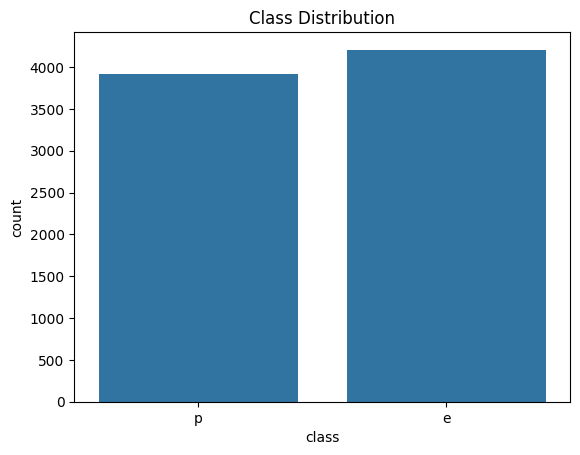

In [86]:
# Create a count plot for class balance
sns.countplot(x="class", data=mushrooms)
plt.title("Class Distribution")
plt.show()

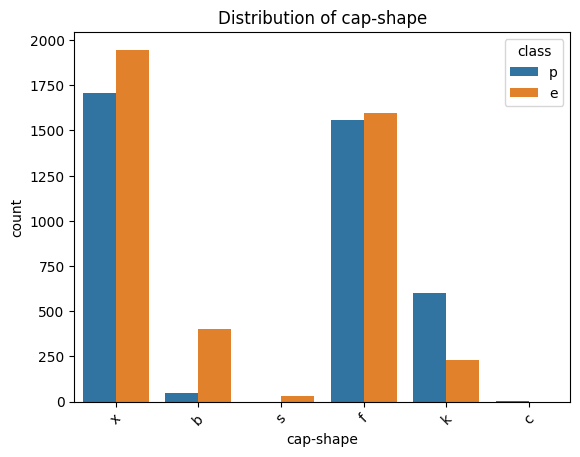

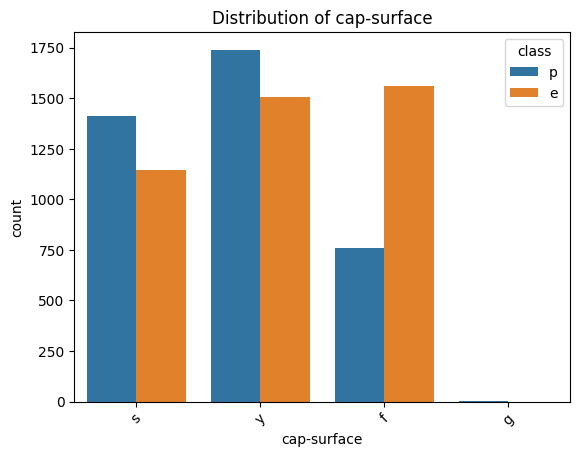

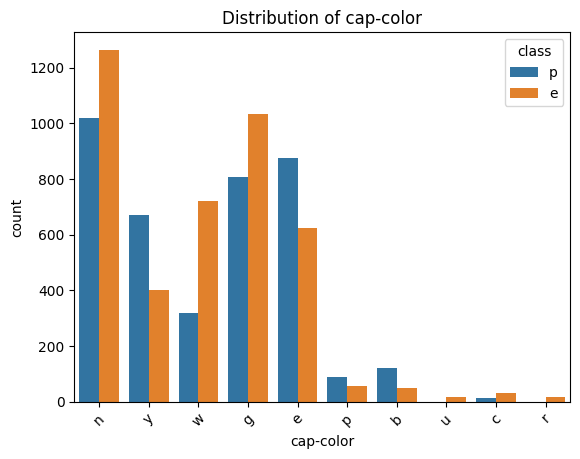

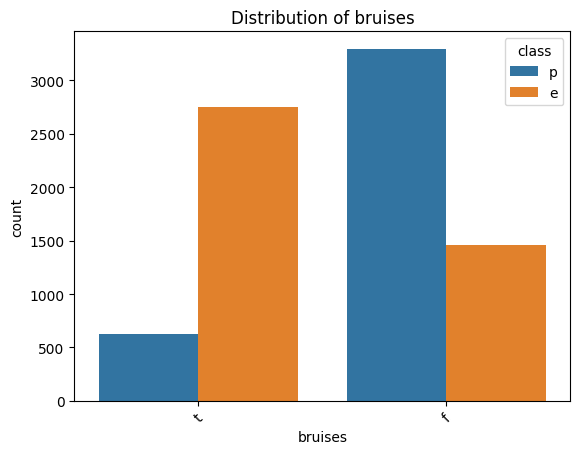

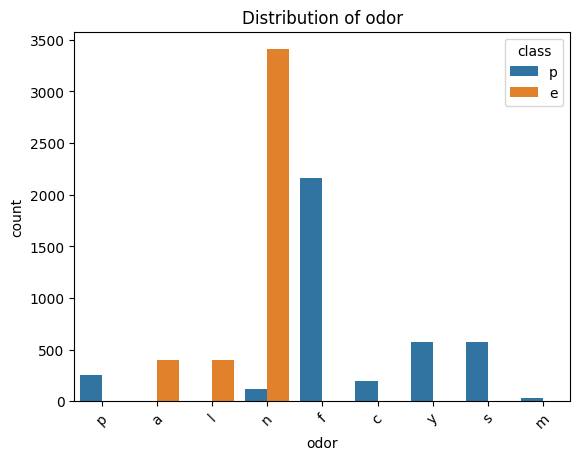

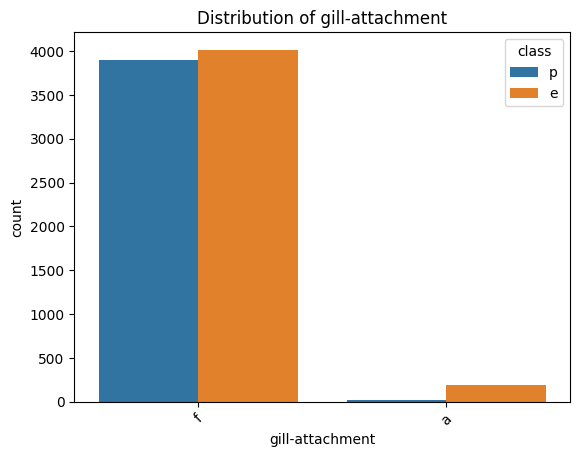

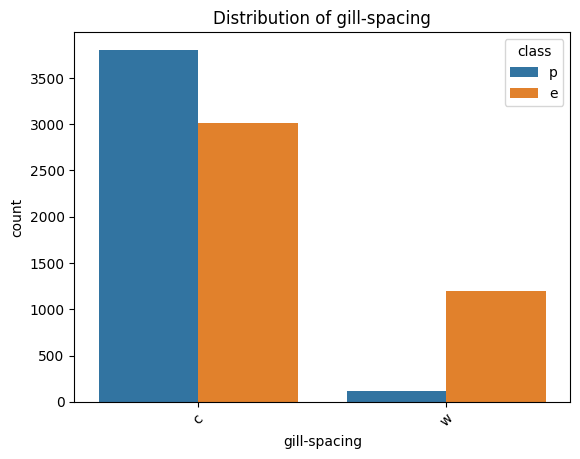

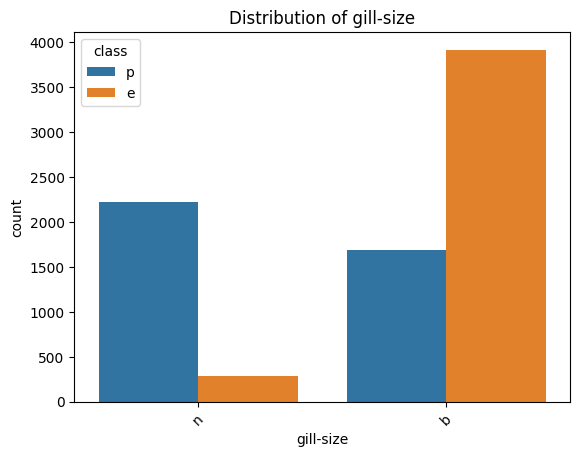

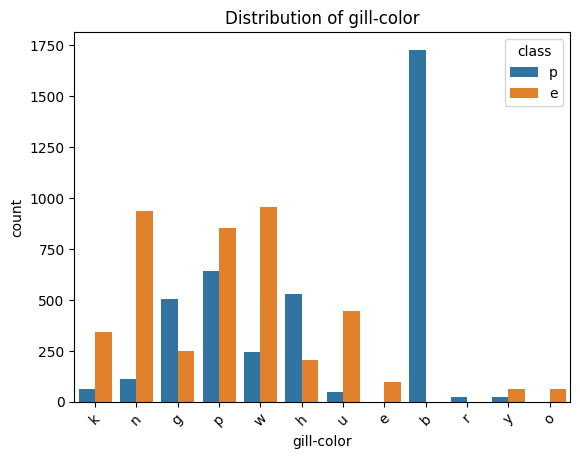

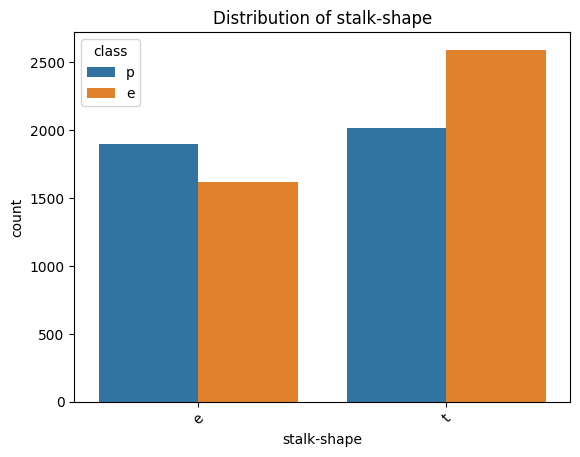

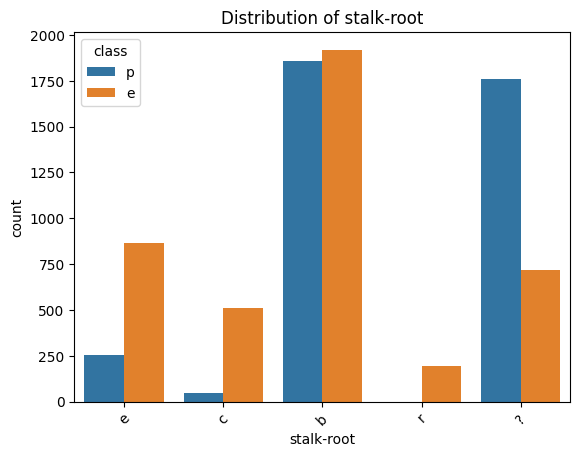

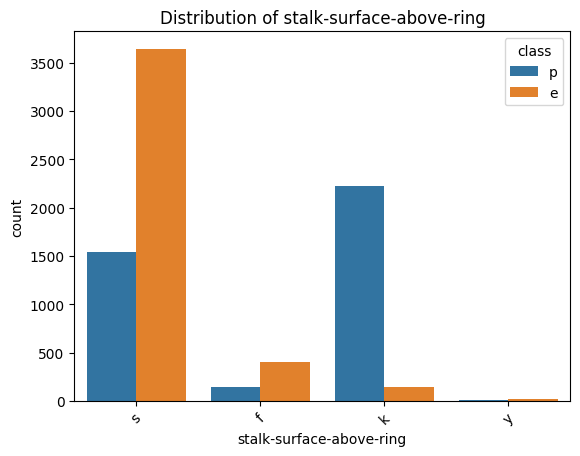

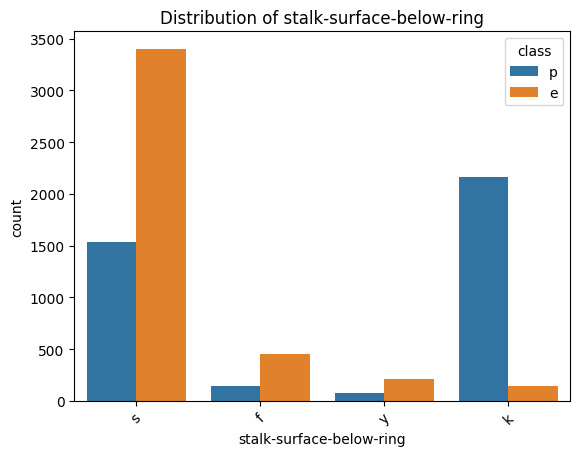

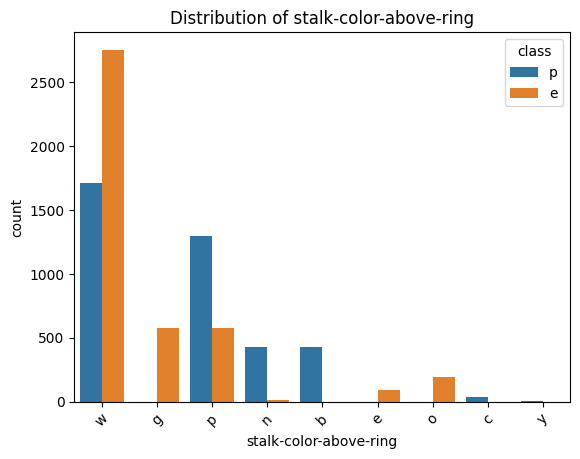

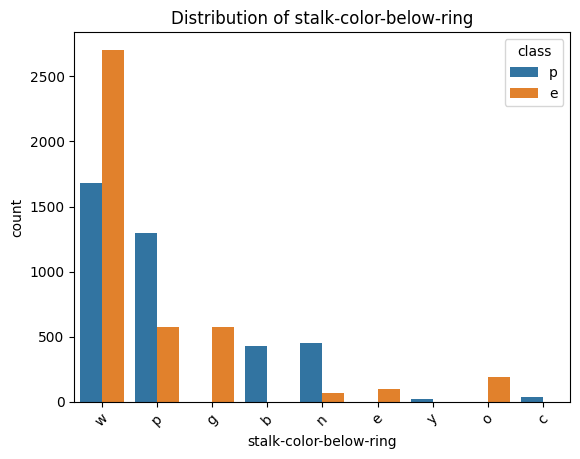

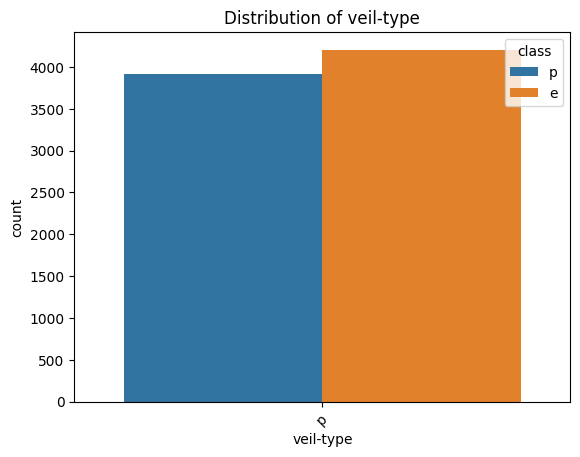

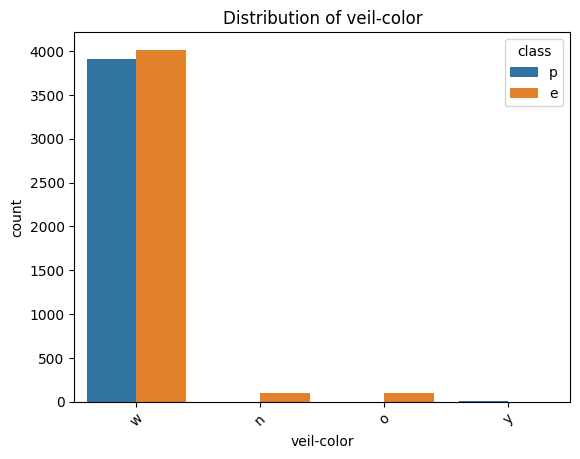

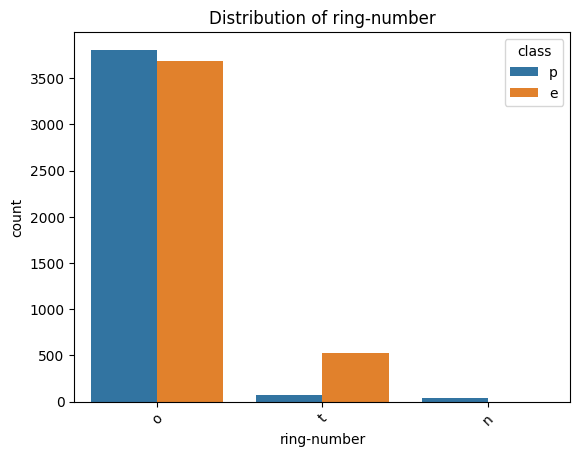

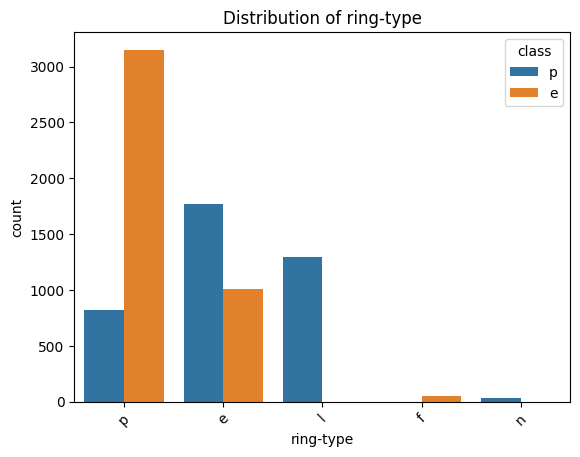

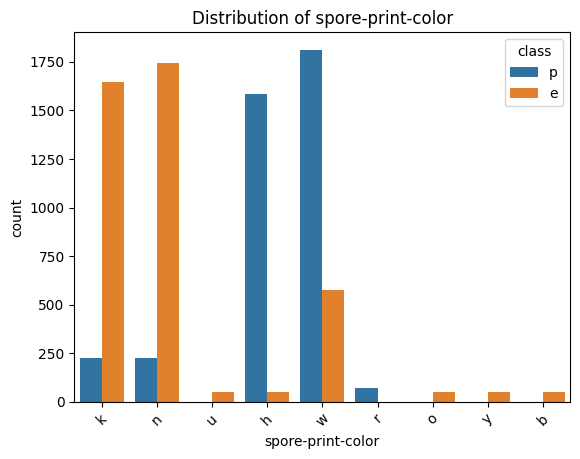

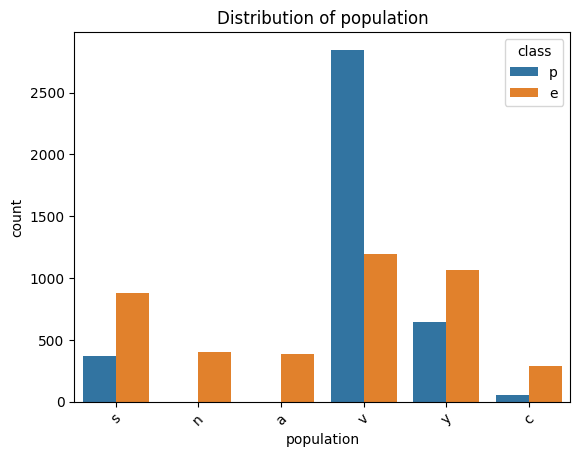

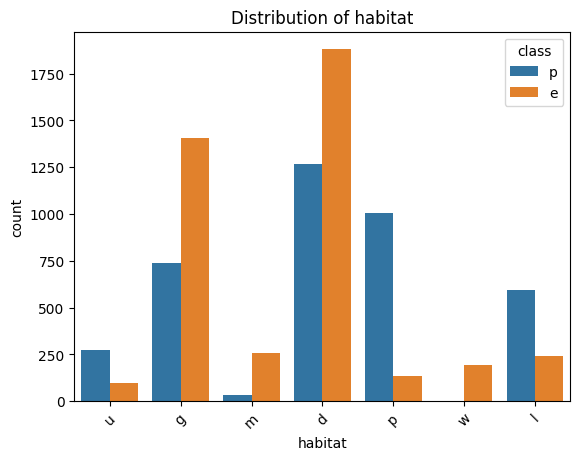

In [87]:
for col in mushrooms.columns:
    if col != "class":
        sns.countplot(x=col, hue="class", data=mushrooms)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

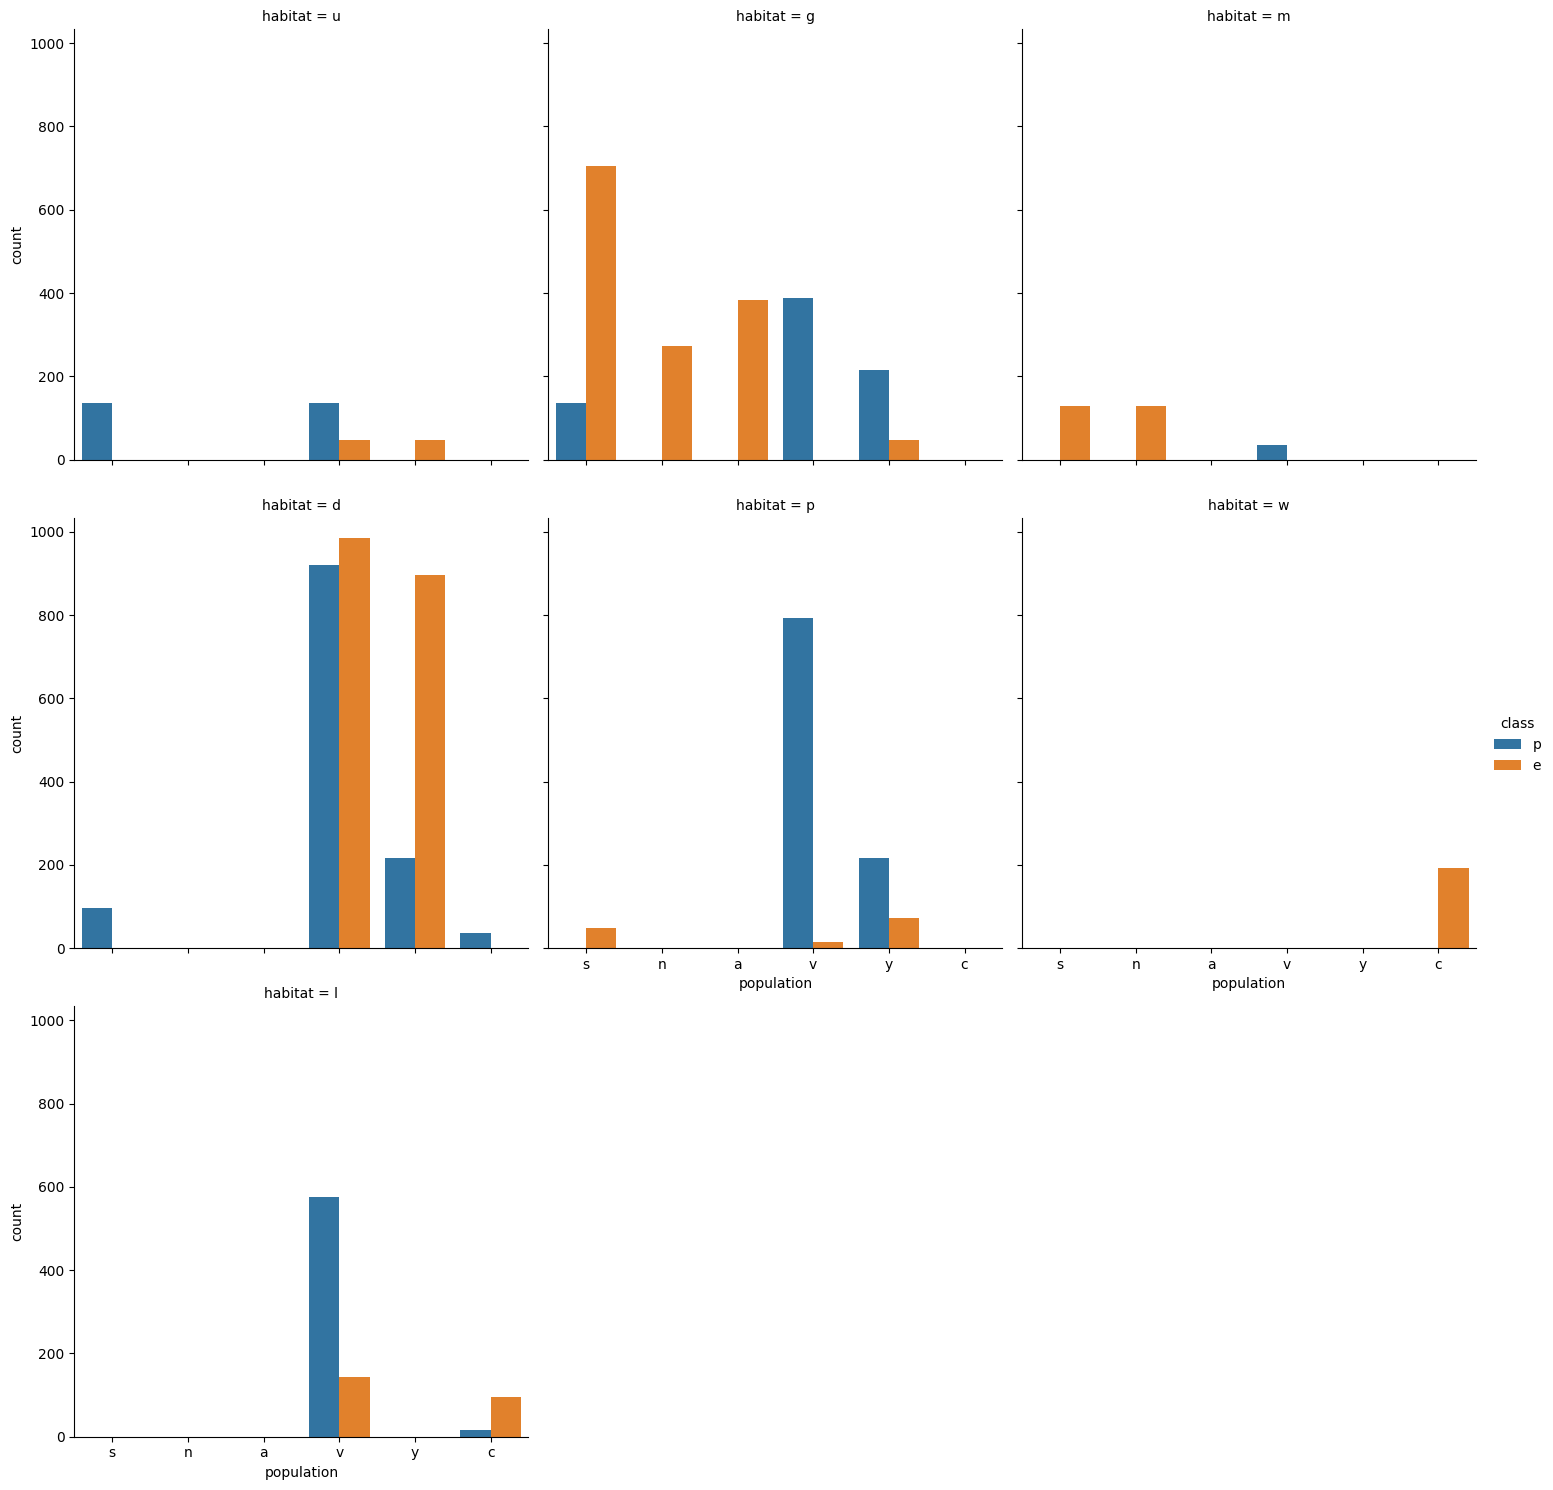

In [88]:
# Create catplot to see distribution of population across habitats
sns.catplot(x="population", hue="class", col="habitat", data=mushrooms, kind="count", col_wrap=3)


### 2.2 Handle Missing Values and Clean Data

In [89]:
# Drop stalk-root (column with missing values)
mushrooms = mushrooms.drop(columns=["stalk-root"])

# Drop veil-type (column that's almost constant)
mushrooms = mushrooms.drop(columns=["veil-type"])

# Rename class column to poisonous
mushrooms = mushrooms.rename(columns={"class": "poisonous"})

### 2.3 Feature Engineering

In [90]:
# Convert categorical data to numeric
mushrooms["poisonous"] = mushrooms["poisonous"].map({"p": 1, "e": 0})

# Merge rare categories of habitat into 'other'
mushrooms["habitat"] = mushrooms["habitat"].apply(lambda x: x if mushrooms["habitat"].value_counts()[x] > 50 else "other")

# Merge features with similar characteristics
mushrooms["ring_number_type"] = mushrooms["ring-number"] + "_" + mushrooms["ring-type"]
mushrooms["gill_size_color"] = mushrooms["gill-size"] + "_" + mushrooms["gill-color"]
mushrooms["stalk_surface"] = mushrooms["stalk-surface-above-ring"] + "_" + mushrooms["stalk-surface-below-ring"]

### Reflection 2:

1) What patterns or anomalies do you see? **A handful of features show the distribution between poisonous/edible to be about 50/50.  Cap-surface, cap-shape, gill-attachment, and stalk-shape are good examples of this.**

2) Do any features stand out? **Odor and spore-print-color stand out the most as features that can predict poison.**

3) What preprocessing steps were necessary to clean and improve the data?  **I dropped a handful of columns, they were either missing a lot of values or constant between poisonous/edible.**

4) Did you create or modify any features to improve performance?  **I made the target a binary feature.  For 'habitat' I put the rare habitats in single other category.  Lastly, I merged categories that had similar properties so that there are less features to work with.**